As a test example, we are going to use the Scikit learns wine dataset. We can import this directly. In this example, the $y$ variable is the wine class of which there are 3. The $X$ variables are characteristics that are normally used to characterise wine.

In [29]:
import pandas as pd
from sklearn.datasets import load_wine
import numpy as np
data = load_wine()

#data.feature_names = np.delete(data.feature_names,0,axis=0)
#data.data = np.delete(data.data,0,axis=1)

X=data.data
print(len(X[1,:]))
y=data.target
df_X=pd.DataFrame(X,columns=data.feature_names)
print(df_X.corr())

import seaborn as sns
%matplotlib inline


# calculate the correlation matrix
corr = df_X.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)



13
                               alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   

                              alcalinity_of_ash  magnesium  total_phenols  \
alcohol                

For demonstration purposes, we split the dataset into training and test. However, if you are doing this on  a real dataset it may be worthwhile using a bootstrapping approach.

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train[1,:])

[ 12.22   1.29   1.94  19.    92.     2.36   2.04   0.39   2.08   2.7
   0.86   3.02 312.  ]


The next 2 pieces of code are not really necessary but demonstrate how random forests don't need normalised or standardised data.

In [31]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)
print(X_train[1,:])

[0.31989247 0.08403361 0.31182796 0.43298969 0.23913043 0.45323741
 0.48012232 0.48076923 0.52531646 0.1356256  0.27350427 0.64102564
 0.        ]


In [32]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)
print(X_train[1,:])

[-0.95609928 -0.96608672 -1.53725357 -0.14748691 -0.55401928  0.16998569
  0.07243241  0.20791318  0.78462633 -0.98210744 -0.40859506  0.58118003
 -1.41336684]


The next code fragment imports random forest classifier from scikit learn. The n_estimators refers to the number of random trees we are going to examine and the n_jobs=-1 specifies that all available processors should be used. I have also added in a variable here called no_f. This variable allows us to set the number of features in our training set. 

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
no_f=13
feat_labels = data.feature_names[0:no_f]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train[:,0:no_f], y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train[:,0:no_f].shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[f],importances[indices[f]]))



1) alcohol                        0.182483
 2) malic_acid                     0.158610
 3) ash                            0.150948
 4) alcalinity_of_ash              0.131987
 5) magnesium                      0.106589
 6) total_phenols                  0.078243
 7) flavanoids                     0.060718
 8) nonflavanoid_phenols           0.032033
 9) proanthocyanins                0.025400
10) color_intensity                0.022351
11) hue                            0.022078
12) od280/od315_of_diluted_wines   0.014645
13) proline                        0.013916


Now we are going to plot the attribute importance.

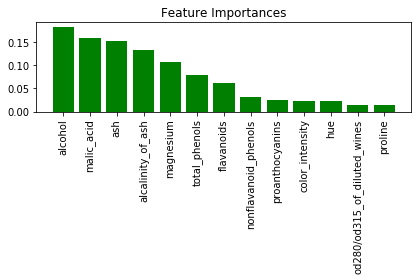

In [35]:
import matplotlib.pyplot as plt

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='green', align='center')
plt.xticks(range(X_train.shape[1]),feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

Adjust the variable that goes into the $X_train$ dataset. See if the variable importance is affected by the correlation between the features. Put your comments on the comments board.